In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

SUPERVISED LEARNING

In [ ]:
# LOADING DATA
kidney = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/kidney_disease.csv')
pd.set_option('display.max_columns', None)
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
kidney.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar',
                          'rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria',
                          'bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine',
                          'sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume',
                          'wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension',
                          'dm':'diabetes mellitus',
                          'cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)

In [ ]:
kidney.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


DATA PREPROCESSING

In [ ]:
kidney.isnull().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       130
white blood cell count     105
potassium                   88
sodium                      87
packed cell volume          70
pus cell                    65
hemoglobin                  52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus cell clumps              4
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
anemia                       1
appetite                     1
pedal edema                  1
id                           0
class                        0
dtype: int64

In [ ]:
kidney.drop(['id'], axis=1, inplace=True)  #....droping the id column

In [ ]:
# spliting data into categorical and numerical datatypes
cat = kidney.select_dtypes(include=['category','object'])
num = kidney.select_dtypes(include = 'number')

print(f"\t \t \t CATEGORICAL VARIABLES")
display(cat.head())

print(f"\t \t \t \n  \n NUMERICAL VARIABLES")
display(num.head())

	 	 	 CATEGORICAL VARIABLES


,red blood cells,pus cell,pus cell clumps,bacteria,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


	 	 	 
  
 NUMERICAL VARIABLES


,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


In [ ]:
# select categorical columns that are numbers
    
bad_cat = ['packed cell volume', 'white blood cell count','red blood cell count']
for i in bad_cat:
    kidney[i] = pd.to_numeric(kidney[i], errors = 'coerce')
    
newCat = kidney.select_dtypes(include = ['category','object'])
newNum = kidney.select_dtypes(include = 'number')

print('\t \t \tCATEGORICAL COLUMNS')
display(newCat.head())

print(f"\t \t \t \n \n NUMERICAL COLUMNS")
display(newNum.head())


	 	 	CATEGORICAL COLUMNS


,red blood cells,pus cell,pus cell clumps,bacteria,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


	 	 	 
 
 NUMERICAL COLUMNS


,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6


In [ ]:
# TREATING MISSING VALUES
for i in newCat:
    kidney[i].fillna(kidney[i].mode()[0],  inplace = True)
for i in newNum:
    kidney[i].fillna(kidney[i].median(), inplace = True)
    
kidney.isnull().sum().sort_values(ascending = False).head()

age            0
potassium      0
anemia         0
pedal edema    0
appetite       0
dtype: int64

In [ ]:
# LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
label  = LabelEncoder()
for i in newCat:
    kidney[i] = label.fit_transform(kidney[i])
    
kidney.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,3,1,0,0,0,0


In [ ]:
# DEFINE X & Y
x = kidney.drop(['class'], axis = 1)
y = kidney['class']

In [ ]:
# STANDARDIZE
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
kidney_scale = pd.DataFrame()

for i in x.columns:
   kidney_scale[[i]] = scale.fit_transform(x[[i]])

kidney_scale.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,-0.210031,0.254214,0.421486,0.076249,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.320122,-0.419451,-0.319668,0.040104,-0.062903,1.053226,0.603224,-0.197314,0.550044,1.311903,1.209416,-0.276686,-0.507801,-0.484322,-0.420084
1,-2.627234,-1.972476,0.421486,2.363728,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.320122,-0.784315,-0.390819,0.040104,-0.062903,-0.457965,-0.132789,-0.909782,0.074073,-0.762252,-0.518321,-0.276686,-0.507801,-0.484322,-0.420084
2,0.615355,0.254214,-1.421074,0.838742,2.507853,0.36489,0.484322,-0.342518,-0.241249,3.697618,-0.074858,-0.212942,0.040104,-0.062903,-1.084556,-0.991470,-0.316059,0.074073,-0.762252,1.209416,-0.276686,1.969276,-0.484322,2.380476
3,-0.210031,-0.488016,-2.342354,2.363728,-0.380269,0.36489,-2.064742,2.919556,-0.241249,-0.373337,-0.014047,0.142813,-2.896333,-0.737181,-0.494823,-0.868801,-0.632711,-0.996862,1.311903,-0.518321,-0.276686,1.969276,2.064742,2.380476
4,-0.033163,0.254214,-1.421074,0.838742,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.519679,-0.622154,-0.284093,0.040104,-0.062903,-0.347390,-0.500795,-0.395222,-0.163913,-0.762252,-0.518321,-0.276686,-0.507801,-0.484322,-0.420084


MODELLING


In [ ]:
# SPLITTING data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(x,y, random_state = 3, stratify=y)
print(f" X Train rows and column: {x_train.shape}")
print(f" Y Train rows and column: {y.shape}")
print(f" X Test rows and column: {x_test.shape}")
print(f" Y Test rows and column: {y_test.shape}")


 X Train rows and column: (300, 24)
 Y Train rows and column: (400,)
 X Test rows and column: (100, 24)
 Y Test rows and column: (100,)


In [ ]:
# CONCATENATING THE DATAFRAME
train = pd.concat([x_train, y_train], axis = 1)  #....join x and y train
print('train dataframe:', train.shape)
test = pd.concat([x_test, y_test])  #...join x and y test
print('test dataframe:', test.shape)

train dataframe: (300, 25)
test dataframe: (200, 25)


In [ ]:
train.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
382,48.0,80.0,1.025,0.0,0.0,1,1,0,0,75.0,22.0,0.8,137.0,5.0,16.8,51.0,6000.0,6.5,0,3,1,0,0,0,2
123,43.0,80.0,1.015,2.0,3.0,1,0,1,1,121.0,30.0,1.1,138.0,4.4,14.0,42.0,14900.0,4.8,0,3,1,0,0,0,0
137,45.0,60.0,1.010,2.0,0.0,1,0,1,0,268.0,86.0,4.0,134.0,5.1,10.0,29.0,9200.0,4.8,1,4,1,0,0,0,0
279,24.0,70.0,1.025,0.0,0.0,1,1,0,0,140.0,23.0,0.6,140.0,4.7,16.3,48.0,5800.0,5.6,0,3,1,0,0,0,2
298,34.0,60.0,1.020,0.0,0.0,1,1,0,0,91.0,49.0,1.2,135.0,4.5,13.5,48.0,8600.0,4.9,0,3,1,0,0,0,2


In [ ]:
test.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,0
180,73.0,90.0,1.010,1.0,4.0,0.0,0.0,1.0,0.0,234.0,56.0,1.9,138.0,4.4,10.30,28.0,8000.0,4.8,0.0,4.0,1.0,0.0,0.0,0.0,NaN
375,70.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,74.0,41.0,0.5,143.0,4.5,15.10,48.0,9700.0,5.6,0.0,3.0,1.0,0.0,0.0,0.0,NaN
82,38.0,70.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,104.0,77.0,1.9,140.0,3.9,12.65,40.0,8000.0,4.8,1.0,3.0,1.0,1.0,1.0,0.0,NaN
256,60.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,131.0,10.0,0.5,146.0,5.0,14.50,41.0,10700.0,5.1,0.0,3.0,1.0,0.0,0.0,0.0,NaN
170,66.0,70.0,1.015,2.0,5.0,1.0,1.0,0.0,0.0,447.0,41.0,1.7,131.0,3.9,12.50,33.0,9600.0,4.4,1.0,4.0,1.0,0.0,0.0,0.0,NaN


LOGISTIC REGRESSION


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

# Model Creation
model = logistic.fit(x_train, y_train)

# Predict the test data for checking accuracy
fitness = model.predict(x_train)
# checking for the accuracy of the data using classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, fitness))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       186
           1       0.00      0.00      0.00         1
           2       0.85      0.91      0.88       113

    accuracy                           0.90       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.90      0.90      0.90       300



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

In [ ]:
from sklearn.metrics import classification_report   
prediction = logistic.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        62
           1       0.00      0.00      0.00         1
           2       0.86      0.86      0.86        37

    accuracy                           0.89       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.88      0.89      0.89       100



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

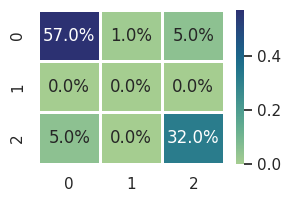

In [ ]:
# importing confusion matrix library
from sklearn.metrics import confusion_matrix
revealer = confusion_matrix(prediction, y_test)

plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

KNN

In [ ]:
# importing the KNN libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

neighbours = 20
scores=[]
for k in range(1, neighbours):
    knn = KNeighborsClassifier(neighbours - k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    print('Accuracy for k=',k,'is: ',round(accuracy_score(y_pred, y_test), 2))
    scores.append(round(accuracy_score(y_pred, y_test), 2))

print(f"\nTHE BEST RESULT IS = {max(scores)}")

Accuracy for k= 1 is:  0.69
Accuracy for k= 2 is:  0.74
Accuracy for k= 3 is:  0.74
Accuracy for k= 4 is:  0.72
Accuracy for k= 5 is:  0.71
Accuracy for k= 6 is:  0.71
Accuracy for k= 7 is:  0.7
Accuracy for k= 8 is:  0.72
Accuracy for k= 9 is:  0.73
Accuracy for k= 10 is:  0.74
Accuracy for k= 11 is:  0.75
Accuracy for k= 12 is:  0.75
Accuracy for k= 13 is:  0.75
Accuracy for k= 14 is:  0.76
Accuracy for k= 15 is:  0.8
Accuracy for k= 16 is:  0.77
Accuracy for k= 17 is:  0.8
Accuracy for k= 18 is:  0.73
Accuracy for k= 19 is:  0.77

THE BEST RESULT IS = 0.8


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.77      0.77      0.77        62
           1       0.00      0.00      0.00         1
           2       0.61      0.62      0.61        37

    accuracy                           0.71       100
   macro avg       0.46      0.47      0.46       100
weighted avg       0.70      0.71      0.71       100



<Axes: >

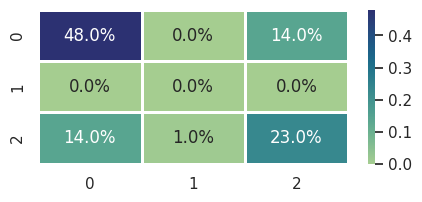

In [ ]:
# Now we use the optimal number of K that gives the best result which is 15
knn = KNeighborsClassifier(15)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))
# confusion matrix
revealer = confusion_matrix(y_pred, y_test)
plt.figure(figsize=[5,2])
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "gini", random_state = 100)
# Model Creation
model= tree.fit(x_train, y_train)
# Predict the test data for checking accuracy
prediction =model.predict(x_test)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        62
           1       0.00      0.00      0.00         1
           2       0.92      0.95      0.93        37

    accuracy                           0.94       100
   macro avg       0.62      0.63      0.63       100
weighted avg       0.93      0.94      0.94       100



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

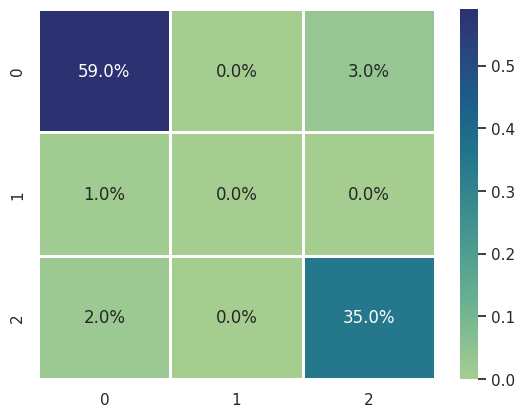

In [ ]:
model_predict =model.predict(x_test)
print(classification_report(y_test,model_predict))
revealer = confusion_matrix(y_test,model_predict)

sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

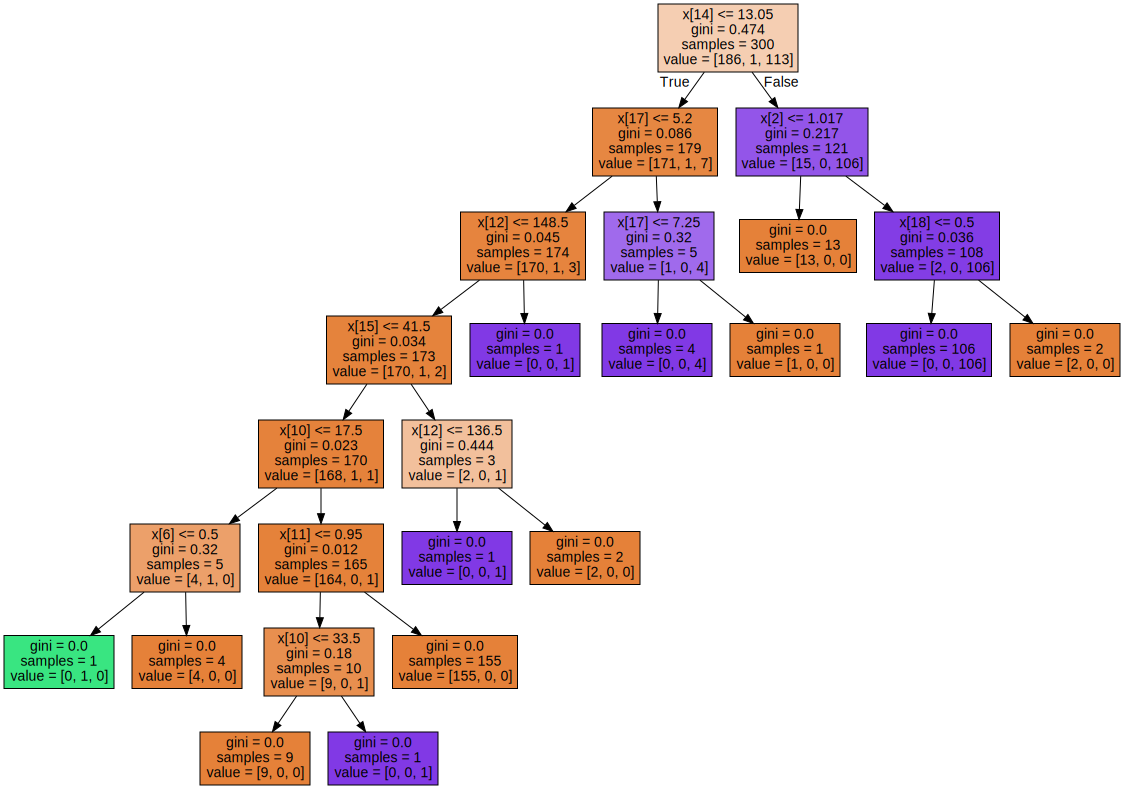

In [ ]:
# VISUALIZING THE DECISION TREE
from sklearn import  tree
tree_model = tree.DecisionTreeClassifier(random_state =0)  
tree_model.fit(x_train, y_train)   #fitting  model
y_pred=tree_model.predict(x_test)   # evaluating model


# USING GRAPHVIZ
import graphviz
dd =tree.export_graphviz(tree_model, out_file =None, filled=True)

graph= graphviz.Source(dd,format ='png')
graph

RANDOM FOREST

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98        62
           1       0.00      0.00      0.00         1
           2       0.97      0.97      0.97        37

    accuracy                           0.97       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.96      0.97      0.97       100



<Axes: >

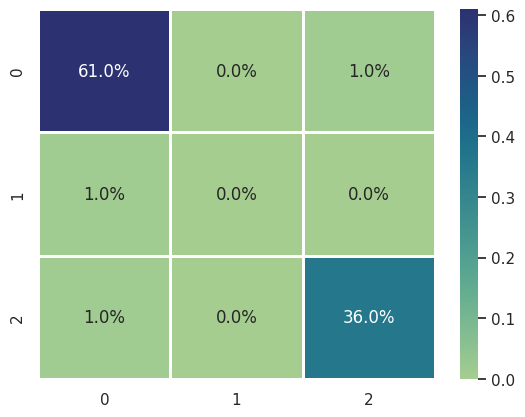

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
# Model Creation
model=random.fit(x_train, y_train)
# Predict the test data for checking accuracy
prediction = model.predict(x_test)

model_predict = model.predict(x_test)
print(classification_report(y_test, model_predict))
revealer = confusion_matrix(y_test, model_predict)

sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

UNSUPERVISED LEARNING

In [ ]:
kidney.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,3,1,0,0,0,0


In [ ]:
kidney.drop(['class'],axis=1, inplace=True)
kidney.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,4,1,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0,3,1,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0,4,1,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,3,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,3,1,0,0,0


In [ ]:
data = kidney[['blood_pressure','diabetes mellitus']]
data.head()

,blood_pressure,diabetes mellitus
0,80.0,4
1,50.0,3
2,80.0,4
3,70.0,3
4,80.0,3


In [ ]:
data.isnull().sum()

blood_pressure       0
diabetes mellitus    0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(data) 
scaled_df
  
# # Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
normalized_df.head()

,0,1
0,0.205700,0.978615
1,-0.967165,-0.254149
2,0.205700,0.978615
3,-0.685502,-0.728071
4,0.440346,-0.897828


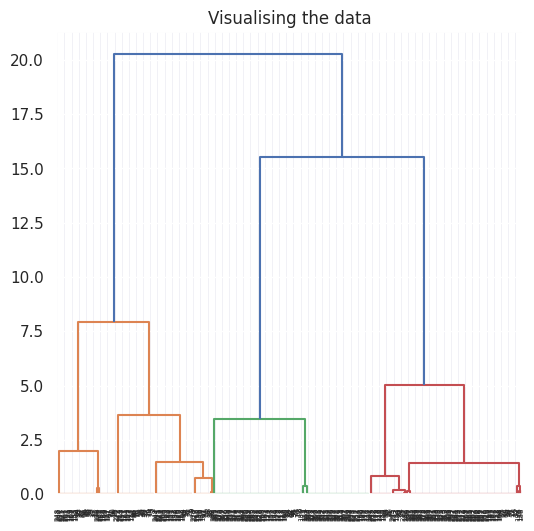

In [ ]:
# HIERARCHICAL CLUSTERING
# VISUALIZING THE DATA
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(normalized_df, method ='ward'))) 

In [ ]:
# Having gotten the optimal number of the cluster as 5, then we train the hierarchical  dataset
# IMPORTING CLUSTRING ALGORITHM
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 5,  affinity = 'euclidean', linkage= 'complete')

#Applying agglomerative algorithm with 4 clusters, using euclidean distance as a metric
pred = model.fit_predict(data)
dataa = data.values


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


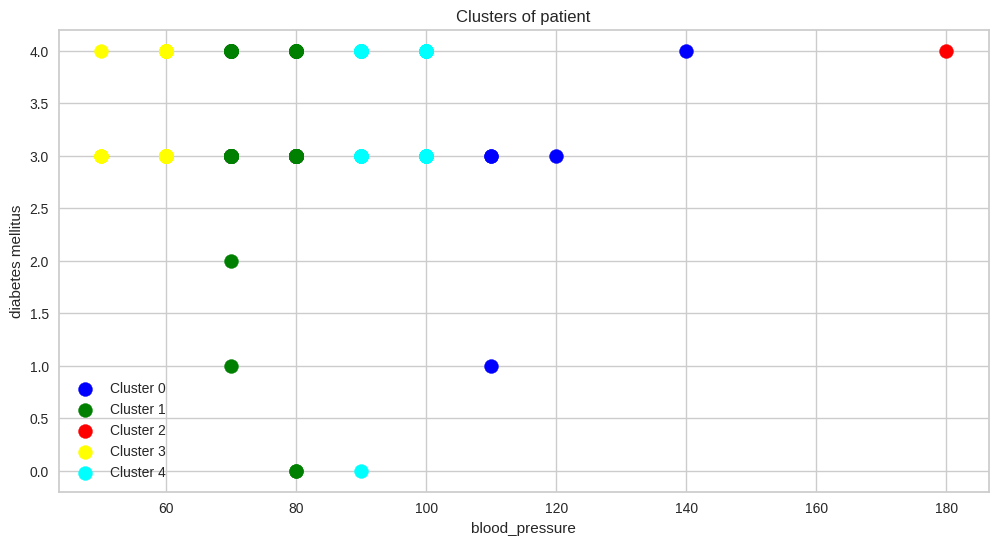

In [ ]:
#visulaizing the clusters 
plt.figure(figsize = (12, 6)) 
plt.scatter(dataa[pred == 0, 0], dataa[pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 0')  
plt.scatter(dataa[pred == 1, 0], dataa[pred == 1, 1], s = 100, c = 'green', label = 'Cluster 1')  
plt.scatter(dataa[pred== 2, 0], dataa[pred == 2, 1], s = 100, c = 'red', label = 'Cluster 2')  
plt.scatter(dataa[pred == 3, 0], dataa[pred == 3, 1], s = 100, c = 'yellow', label = 'Cluster 3')  
plt.scatter(dataa[pred == 4, 0], dataa[pred == 4, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.title('Clusters of patient')  
plt.xlabel('blood_pressure')  
plt.ylabel('diabetes mellitus')  
plt.legend()  
plt.show()  

KMEANS

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

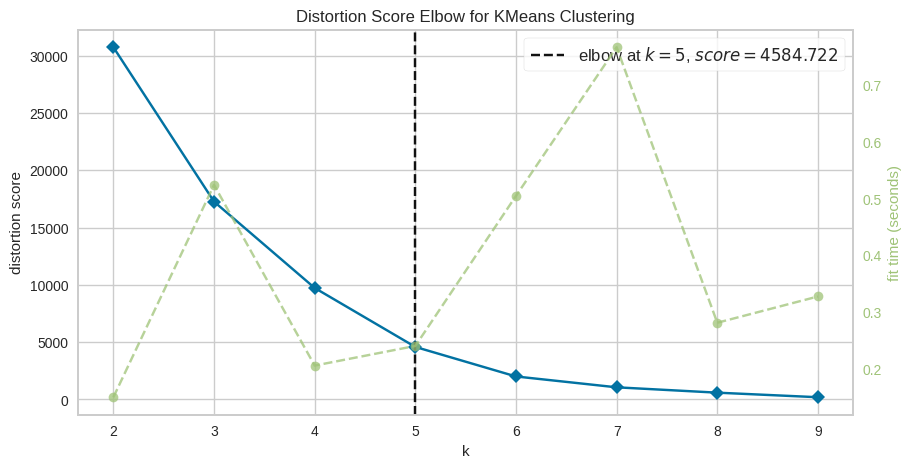

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#install yellowbrick to vizualize the Elbow curve
# !pip install yellowbrick  --q

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(2,10))
 
plt.figure(figsize = (10, 5))
visualizer.fit(data) #............................................................. Fit the data to the visualizer
visualizer.show() #............................................................. Finalize and render the figure

In [ ]:
# Having gotten the optimal number of K which is 5, we fit kmeans on our dataset.
km_5 = KMeans(n_clusters = 5).fit(data) # ..................................... Fit Kmeans Algorthm on the Data Subset

new = data.values
km_label = km_5.labels_ # ............................................. Instantiate the labels of the model

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


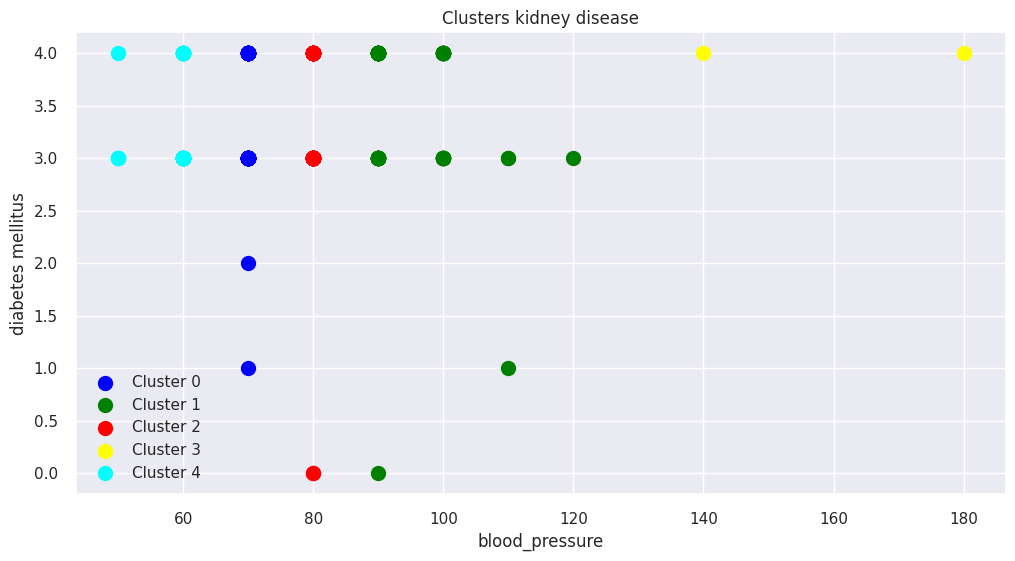

In [ ]:
#visulaizing the clusters 
sns.set(style = 'darkgrid')

plt.figure(figsize = (12, 6)) 
plt.scatter(new[km_label ==0,  0], new[km_label == 0, 1], s = 100, c = 'blue', label = 'Cluster 0')  
plt.scatter(new[km_label == 1, 0], new[km_label == 1, 1], s = 100, c = 'green', label = 'Cluster 1')  
plt.scatter(new[km_label== 2, 0], new[km_label == 2, 1], s = 100, c = 'red', label = 'Cluster 2')  
plt.scatter(new[km_label == 3, 0], new[km_label == 3, 1], s = 100, c = 'yellow', label = 'Cluster 3')  
plt.scatter(new[km_label == 4, 0], new[km_label == 4, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.title('Clusters kidney disease')  
plt.xlabel('blood_pressure')
plt.ylabel('diabetes mellitus')

plt.legend()  
plt.show()  